# 1.3 패널 회귀분석

- [1 설명변수 요약](#1-설명변수-요약)
- [2 패널 회귀분석 I](#2-패널-회귀분석-I)
- [3 패널 회귀분석 II](#3-패널-회귀분석-II)
- [부록: 패널 회귀분석 모형 비교](#부록:-패널-회귀분석-모형-비교)

## 1 설명변수 요약

**데이터 불러오기**

In [1]:
import pandas as pd
import numpy as np

panel_data = pd.read_csv('../Data/panel_data.csv')
panel_data

,ID,PID,WAVE,SURVEY1,S_GENDER,S_AGE,S_AREA1,par_age_1,par_age_2,par_edu_1,...,GENDER,par_edu_m,par_edu_f,income,life_satis,achiev,fa_support,parenting_a,parenting_b,bullying
0,1,100003,1.0,1.0,2.0,10.0,2.0,35.0,46.0,3.0,...,2.0,3.0,2.0,3.2,4.000000,3.857143,3.000000,4.0,2.8,1.000000
1,2,100008,1.0,1.0,2.0,10.0,2.0,31.0,41.0,2.0,...,2.0,2.0,4.0,2.0,4.000000,4.000000,4.000000,4.0,1.2,1.166667
2,3,100012,1.0,1.0,1.0,10.0,2.0,38.0,43.0,4.0,...,1.0,4.0,2.0,2.5,2.000000,2.714286,3.000000,3.0,2.2,1.666667
3,4,100016,1.0,1.0,1.0,9.0,2.0,33.0,37.0,2.0,...,1.0,2.0,2.0,3.0,4.000000,2.714286,3.714286,3.0,1.8,1.000000
4,5,100022,1.0,1.0,1.0,10.0,2.0,37.0,38.0,2.0,...,1.0,2.0,2.0,3.0,4.000000,2.714286,3.714286,4.0,1.6,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16345,1630,107538,10.0,1.0,1.0,19.0,3.0,39.0,46.0,4.0,...,1.0,4.0,4.0,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
16346,1631,107542,10.0,1.0,2.0,19.0,3.0,47.0,55.0,4.0,...,2.0,4.0,1.0,NaN,3.333333,NaN,NaN,NaN,NaN,NaN
16347,1632,107547,10.0,1.0,1.0,19.0,3.0,44.0,55.0,4.0,...,1.0,4.0,2.0,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
16348,1633,107554,10.0,1.0,2.0,19.0,3.0,46.0,54.0,4.0,...,2.0,4.0,2.0,NaN,3.000000,NaN,NaN,NaN,NaN,NaN


**`linearmodels` 패키지 설치**

In [2]:
multicultural = panel_data.rename(
    columns={"GENDER": "male",
             "health_01": "health",
             "edu_plan_01": "edu_plan",
             "pr_father_01": "pr_father",
             "pr_mother_01": "pr_mother",
             "help_in_sc_01": "help_in_sc",
             "help_community_01": "help_community"}
)
multicultural

,ID,PID,WAVE,SURVEY1,S_GENDER,S_AGE,S_AREA1,par_age_1,par_age_2,par_edu_1,...,male,par_edu_m,par_edu_f,income,life_satis,achiev,fa_support,parenting_a,parenting_b,bullying
0,1,100003,1.0,1.0,2.0,10.0,2.0,35.0,46.0,3.0,...,2.0,3.0,2.0,3.2,4.000000,3.857143,3.000000,4.0,2.8,1.000000
1,2,100008,1.0,1.0,2.0,10.0,2.0,31.0,41.0,2.0,...,2.0,2.0,4.0,2.0,4.000000,4.000000,4.000000,4.0,1.2,1.166667
2,3,100012,1.0,1.0,1.0,10.0,2.0,38.0,43.0,4.0,...,1.0,4.0,2.0,2.5,2.000000,2.714286,3.000000,3.0,2.2,1.666667
3,4,100016,1.0,1.0,1.0,9.0,2.0,33.0,37.0,2.0,...,1.0,2.0,2.0,3.0,4.000000,2.714286,3.714286,3.0,1.8,1.000000
4,5,100022,1.0,1.0,1.0,10.0,2.0,37.0,38.0,2.0,...,1.0,2.0,2.0,3.0,4.000000,2.714286,3.714286,4.0,1.6,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16345,1630,107538,10.0,1.0,1.0,19.0,3.0,39.0,46.0,4.0,...,1.0,4.0,4.0,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
16346,1631,107542,10.0,1.0,2.0,19.0,3.0,47.0,55.0,4.0,...,2.0,4.0,1.0,NaN,3.333333,NaN,NaN,NaN,NaN,NaN
16347,1632,107547,10.0,1.0,1.0,19.0,3.0,44.0,55.0,4.0,...,1.0,4.0,2.0,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
16348,1633,107554,10.0,1.0,2.0,19.0,3.0,46.0,54.0,4.0,...,2.0,4.0,2.0,NaN,3.000000,NaN,NaN,NaN,NaN,NaN


In [3]:
multicultural['male'] = np.where(multicultural['male'] == 2, 0, 1)
multicultural['help_in_sc'] = np.where(multicultural['help_in_sc'] == 2, 0, 1)
multicultural['help_community'] = np.where(multicultural['help_community'] == 2, 0, 1)

In [4]:
import pandas as pd

# 원하는 변수 선택
selected_vars = ['ID', 'WAVE', 'score_overall', 'male', 
                 'par_edu_m', 'par_edu_f', 'income', 'health', 'life_satis', 
                 'achiev', 'edu_plan', 'fa_support', 'pr_father', 'pr_mother', 
                 'parenting_a', 'parenting_b', 'bullying', 'help_in_sc', 'help_community']

# 선택한 변수만으로 데이터프레임 생성
df = multicultural[selected_vars]

# 결측치가 있는 행 제거
df = df.dropna()
df

,ID,WAVE,score_overall,male,par_edu_m,par_edu_f,income,health,life_satis,achiev,edu_plan,fa_support,pr_father,pr_mother,parenting_a,parenting_b,bullying,help_in_sc,help_community
0,1,1.0,4.6,0,3.0,2.0,3.2,2.0,4.0,3.857143,4.0,3.000000,4.0,4.0,4.000000,2.8,1.000000,1,1
1,2,1.0,4.2,0,2.0,4.0,2.0,1.0,4.0,4.000000,4.0,4.000000,5.0,5.0,4.000000,1.2,1.166667,0,1
2,3,1.0,3.8,1,4.0,2.0,2.5,2.0,2.0,2.714286,3.0,3.000000,4.0,4.0,3.000000,2.2,1.666667,1,0
3,4,1.0,3.6,1,2.0,2.0,3.0,2.0,4.0,2.714286,4.0,3.714286,4.0,4.0,3.000000,1.8,1.000000,1,0
4,5,1.0,2.8,1,2.0,2.0,3.0,1.0,4.0,2.714286,4.0,3.714286,4.0,5.0,4.000000,1.6,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14710,1630,9.0,3.2,1,4.0,4.0,2.5,2.0,3.0,2.714286,2.0,3.428571,4.0,5.0,2.666667,1.8,1.000000,1,1
14711,1631,9.0,3.4,0,4.0,1.0,2.0,2.0,3.0,3.285714,2.0,3.000000,4.0,4.0,2.666667,3.0,1.000000,0,0
14712,1632,9.0,3.4,1,4.0,2.0,3.0,2.0,3.0,3.000000,2.0,2.142857,4.0,4.0,3.333333,3.2,1.000000,0,0
14713,1633,9.0,3.6,0,4.0,2.0,2.0,2.0,3.0,2.857143,2.0,3.428571,5.0,5.0,3.000000,3.0,1.666667,0,0


### 변수 설명

| 변수명 | 내&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;용 |
|:-----:|:----|
| WAVE <br> (조사차수)   | 1. 2011년 2. 2012년 3. 2013년 4. 2014년 5. 2015년 6. 2016년 7. 2017년 8. 2018년 9. 2019년 10. 2020년   |
| score_overall <br> (종합성적) | - 국어, 영어, 수학, 사회, 과학 성적 평균 <br> 1. 매우 못하는 편이다 2. 못하는 편이다 3. 보통이다 4. 잘하는 편이다 5. 매우 잘하는 편이다 |
| male <br> (성별)    | 0. 여학생  1. 남학생                                                                                      |
| par_edu_m <br> (어머니 학력) <br> par_edu_f <br> (아버지 학력) | 1. 중졸 이하 <br>2. 고졸 <br>3. 대학(2~3년제) 졸업 <br>4. 대학교(4년제 이상) 졸업 <br>5. 대학원 졸업(석박사 포함) |
| income <br> (월평균 소득수준) | 단위: 백만원(세전)                                                                               |
| health <br> (주관적 건강인식) | 1. 매우 건강하다 2. 건강한 편이다 3. 건강하지 못한 편이다 4. 매우 건강하지 못하다                      |
| life_satis <br> (삶의 만족도) | - 나는 사는 게 즐겁다<br>- 나는 걱정거리가 별로 없다<br>- 나는 내 삶이 행복하다고 생각한다             |
| achiev <br> (성취동기)    | - 나는 내가 세운 학습목표를 이루기 위해 노력한다<br>- 나는 내가 좋아하는 일을 잘하기 위해 끝까지 노력한다<br>- 나는 내가 가치있다고 생각하는 일에 대해 최선을 다한다<br>- 나는 나 스스로 학습목표를 결정한다<br>- 나는 스스로 정한 목표를 향해 나아가는 것을 좋아한다<br>- 내가 관심있는 일을 시도하는 것을 즐긴다<br>- 나는 내 자신이 만족할 때까지 노력한다 |
| edu_plan <br> (희망 교육수준) | <1-2차년도> 1.초등학교 2.중학교 3.고등학교 4.대학교<br><3-9차년도> 1.초등학교 2.중학교 3.고등학교 4.대학교 5.대학원 |
| fa_support <br> (가족의 지지) | - 우리 가족은 서로 많이 도와주는 것 같다<br>- 우리 가족은 나를 잘 이해해주는 것 같다<br>- 우리 가족은 가지고 있는 것들을 서로 나누어 가지는 것 같다<br>- 우리 가족은 내가 힘들어할 때 내게 힘과 용기를 주는 것 같다<br>- 우리 가족은 내 생각이나 말을 잘 들어주는 것 같다<br>- 우리 가족은 나를 중요한 사람으로 생각하는 것 같다<br>- 우리 가족은 나에게 관심이 많은 것 같다 |
| pr_father <br> (아버지에 대한 생각) <br> pr_mother <br> (어머니에 대한 생각) | 1. 전혀 자랑스럽지 않다 <br>2. 자랑스럽지 않은 편이다 <br>3. 보통이다 <br>4. 자랑스러운 편이다 <br>5. 매우 자랑스럽다 |
| parenting_a <br> (부모의 감독태도) | - 부모님 또는 보호자는 내가 방과 후에 어디에 가는지 알고 계신다<br>- 부모님 또는 보호자는 내가 시간을 어떻게 보내는지 알고 계신다<br>- 부모님 또는 보호자는 내가 외출할 경우 언제 들어올지 알고 계신다 |
| parenting_b <br> (부모의 방임태도) | - 부모님 또는 보호자는 나보다 바깥일을 더 중요하게 생각하시는 것 같다<br>- 부모님 또는 보호자는 나에게 관심이 없으셔서 칭찬이나 혼내시는 일이 없다<br>- 부모님 또는 보호자는 내가 어떤 생각을 갖고 있는지 관심이 없으시다<br>- 부모님 또는 보호자는 내가 필요로 할 때 곁에 없으시다<br>- 부모님 또는 보호자는 내가 아플 때에도 귀찮아서 병원에 데려가지 않으신다 |
| bullying <br> (집단괴롭힘 피해경험) | - 다른 학생들로부터 따돌림을 당했다<br>- 다른 학생들로부터 욕을 듣거나 심한 집적거림이나 또는 놀림을 당했다<br>- 다른 학생들이 나를 고의로 어떤 일에 끼워주지 않거나 완전히 무시했다<br>- 다른 학생들로부터 맞거나 발로 차이거나 위협을 당했다<br>- 나에 대해 거짓소문을 퍼뜨려서 다른 친구들이 나를 싫어하게 되었다<br>- 다른 학생들로부터 신체 특징이나 외모에 대해 험한 욕설이나 놀림을 당했다 |
| help_in_sc <br> (학교 내 도움을 주는 어른의 유무) | 0. 아니오 1. 예 |
| help_community <br> (학교 밖 도움을 주는 어른의 유무) | 0. 아니오 1. 예 |
|**주:** | life_satis, achiev, fa_support, parenting_a, parenting_b, bullying 등 6개 변수는 표의 해당 문항들에 대한 응답을 평균한 것으로서 모든 문항들은 동일한 4점 척도(1=전혀 그렇지 않다, 2=그렇지 않은 편이다, 3=그런 편이다, 4=매우 그렇다)로 조사됐다. |

In [5]:
shape = df.shape
print(shape)

(11572, 19)


In [6]:
df['WAVE'].value_counts().sort_index()

1.0    1558
2.0    1424
3.0    1373
4.0    1313
5.0    1270
6.0    1249
7.0    1182
8.0    1125
9.0    1078
Name: WAVE, dtype: int64

### 요약 통계량

In [7]:
summary_stats = df.describe()
print(summary_stats)

                 ID          WAVE  score_overall          male     par_edu_m  \
count  11572.000000  11572.000000   11572.000000  11572.000000  11572.000000   
mean     840.748704      4.718026       3.190588      0.491531      2.472001   
std      466.476427      2.579292       0.731391      0.499950      0.911328   
min        1.000000      1.000000       1.000000      0.000000      1.000000   
25%      440.000000      2.000000       2.800000      0.000000      2.000000   
50%      851.000000      5.000000       3.200000      0.000000      2.000000   
75%     1241.000000      7.000000       3.600000      1.000000      3.000000   
max     1634.000000      9.000000       5.000000      1.000000      5.000000   

          par_edu_f        income        health    life_satis        achiev  \
count  11572.000000  11572.000000  11572.000000  11572.000000  11572.000000   
mean       2.001037      2.512627      1.676115      3.102258      3.009222   
std        0.936770      1.506123      0.6

In [8]:
import pandas as pd

# describe() 함수를 사용하여 요약 통계량을 얻습니다.
summary_stats = df.describe()

# 원하는 통계량만 선택합니다.
desired_stats = summary_stats.loc[['min', 'max', 'mean', 'std']]

# Transpose를 사용하여 변수명을 행으로, 통계량을 열로 만듭니다.
desired_stats = desired_stats.transpose()

# 결과를 출력합니다.
print(desired_stats)

                min      max        mean         std
ID              1.0  1634.00  840.748704  466.476427
WAVE            1.0     9.00    4.718026    2.579292
score_overall   1.0     5.00    3.190588    0.731391
male            0.0     1.00    0.491531    0.499950
par_edu_m       1.0     5.00    2.472001    0.911328
par_edu_f       1.0     5.00    2.001037    0.936770
income          0.0    99.99    2.512627    1.506123
health          1.0     4.00    1.676115    0.630243
life_satis      1.0     4.00    3.102258    0.613742
achiev          1.0     4.00    3.009222    0.490790
edu_plan        1.0     5.00    3.658745    0.768367
fa_support      1.0     4.00    3.192669    0.563691
pr_father       1.0     5.00    4.058676    0.895700
pr_mother       1.0     5.00    4.226149    0.787025
parenting_a     1.0     4.00    3.216932    0.598669
parenting_b     1.0     4.00    1.727497    0.600591
bullying        1.0     4.00    1.072027    0.278563
help_in_sc      0.0     1.00    0.464656    0.

### 변화 추이

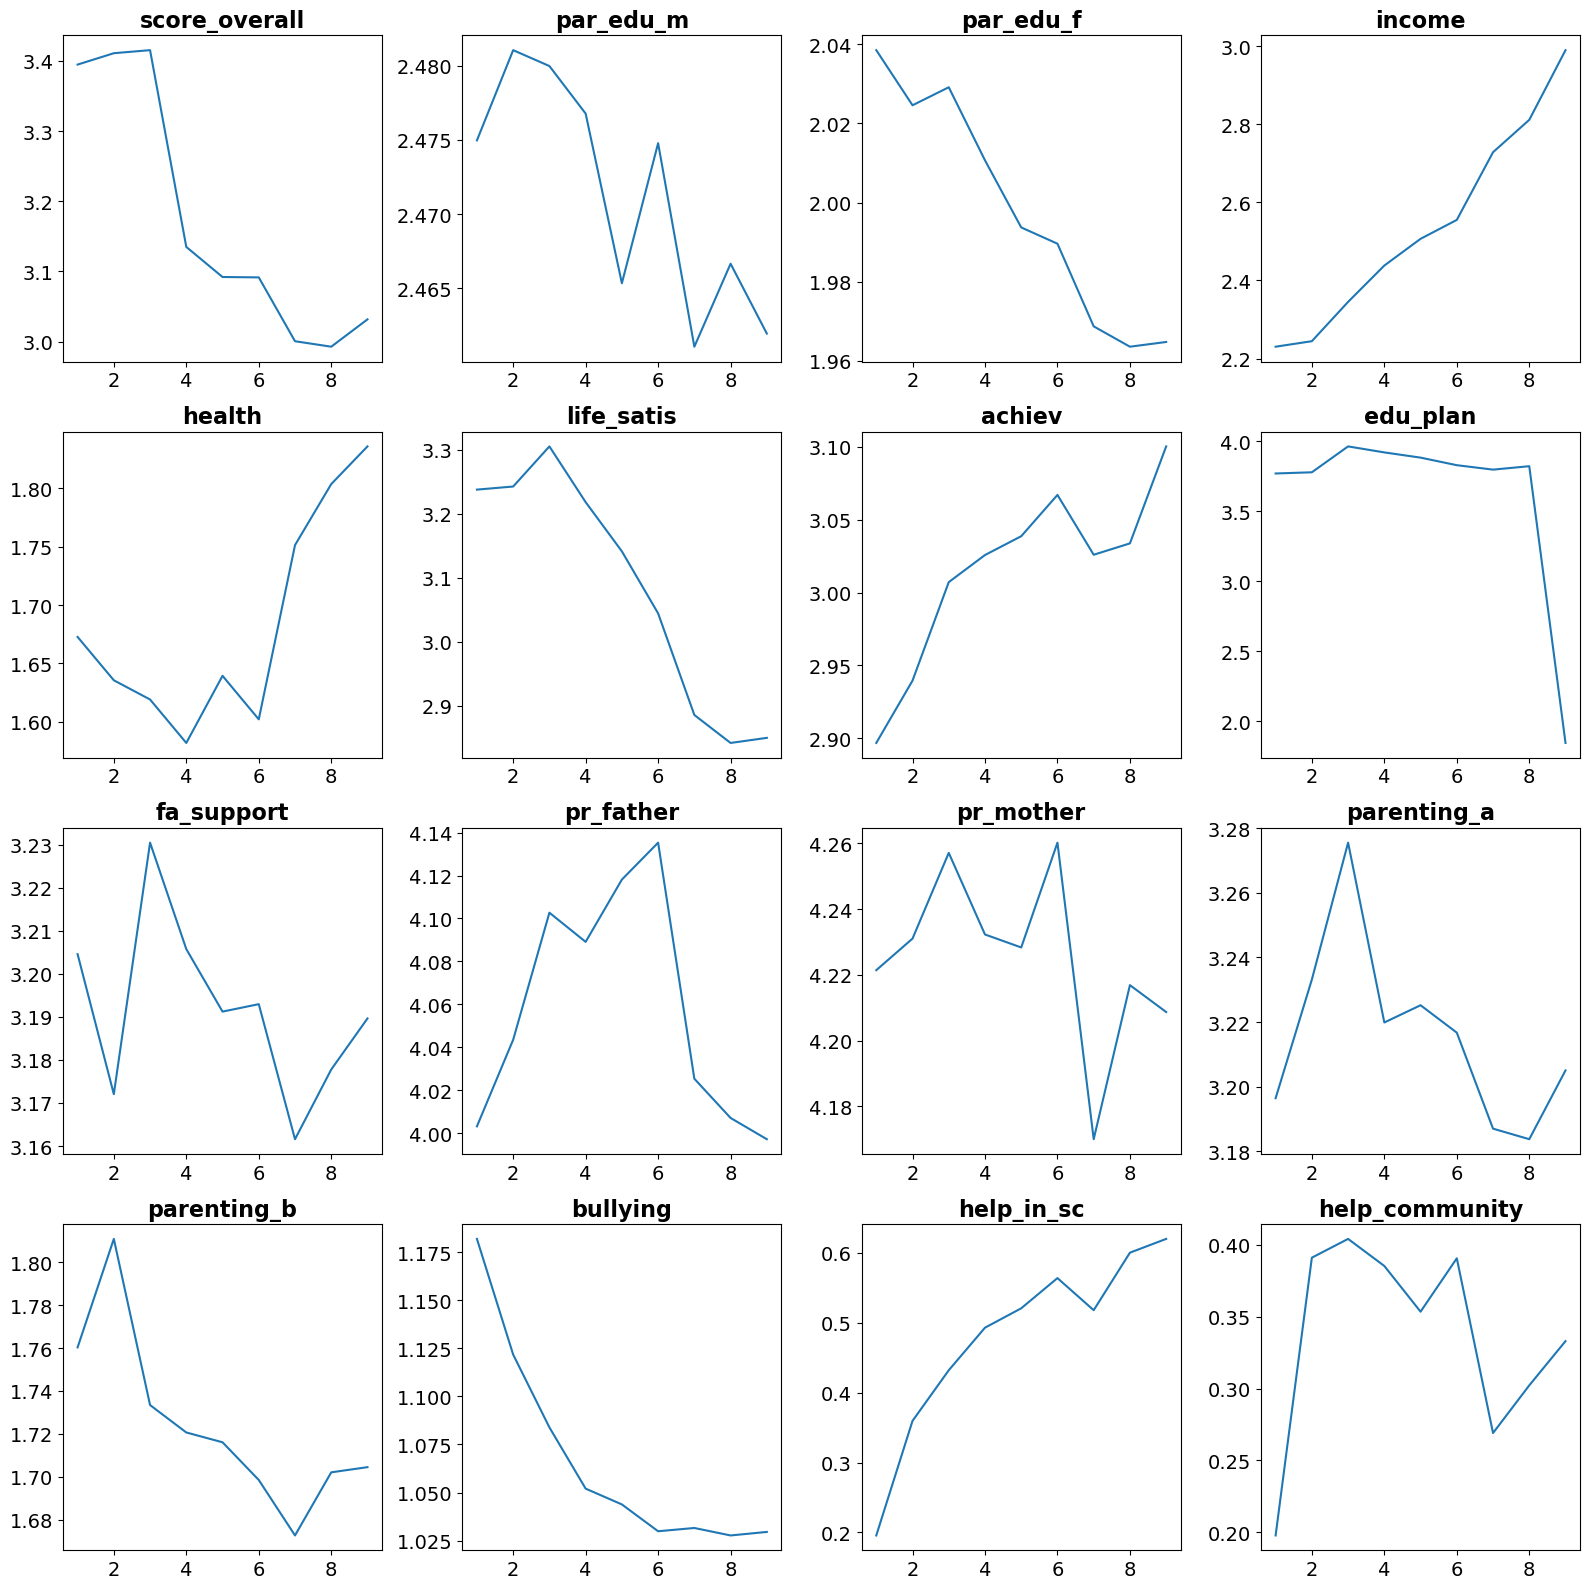

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 그릴 변수들의 리스트
variables = ['score_overall', 'par_edu_m', 'par_edu_f', 'income', 'health', 
             'life_satis', 'achiev', 'edu_plan', 'fa_support', 'pr_father', 
             'pr_mother', 'parenting_a','parenting_b', 'bullying', 'help_in_sc', 
             'help_community']

# 그래프를 4x4로 배열
num_rows, num_cols = 4, 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# 연도별 평균값 그래프를 그립니다.
for i, variable in enumerate(variables):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    
    # 연도별 평균값 계산
    data = df.groupby('WAVE')[variable].mean().reset_index()
    
    # 그래프 그리기
    sns.lineplot(data=data, x='WAVE', y=variable, ax=ax)
    ax.set_title(f'{variable}', fontsize=16, fontweight='bold')
    
    # 틱 레이블의 폰트 크기 조절
    ax.tick_params(axis='both', labelsize=14)  # 폰트 크기를 10으로 설정
    
    # 가로축과 세로축 레이블 없애기
    ax.set_xlabel('')
    ax.set_ylabel('')

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

## 2 패널 회귀분석 I

In [10]:
#!pip install linearmodels  # 처음에 한 번만 설치

In [11]:
# ID와 WAVE를 인덱스로 설정
data = df.set_index(['ID', 'WAVE'])
data

,,score_overall,male,par_edu_m,par_edu_f,income,health,life_satis,achiev,edu_plan,fa_support,pr_father,pr_mother,parenting_a,parenting_b,bullying,help_in_sc,help_community
ID,WAVE,,,,,,,,,,,,,,,,,
1,1.0,4.6,0,3.0,2.0,3.2,2.0,4.0,3.857143,4.0,3.000000,4.0,4.0,4.000000,2.8,1.000000,1,1
2,1.0,4.2,0,2.0,4.0,2.0,1.0,4.0,4.000000,4.0,4.000000,5.0,5.0,4.000000,1.2,1.166667,0,1
3,1.0,3.8,1,4.0,2.0,2.5,2.0,2.0,2.714286,3.0,3.000000,4.0,4.0,3.000000,2.2,1.666667,1,0
4,1.0,3.6,1,2.0,2.0,3.0,2.0,4.0,2.714286,4.0,3.714286,4.0,4.0,3.000000,1.8,1.000000,1,0
5,1.0,2.8,1,2.0,2.0,3.0,1.0,4.0,2.714286,4.0,3.714286,4.0,5.0,4.000000,1.6,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,9.0,3.2,1,4.0,4.0,2.5,2.0,3.0,2.714286,2.0,3.428571,4.0,5.0,2.666667,1.8,1.000000,1,1
1631,9.0,3.4,0,4.0,1.0,2.0,2.0,3.0,3.285714,2.0,3.000000,4.0,4.0,2.666667,3.0,1.000000,0,0
1632,9.0,3.4,1,4.0,2.0,3.0,2.0,3.0,3.000000,2.0,2.142857,4.0,4.0,3.333333,3.2,1.000000,0,0


### 통합(pooled) OLS 모형

In [12]:
import pandas as pd
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects, compare
from statsmodels.api import add_constant

# X 변수
X_with_const = add_constant(
    data[['male', 'par_edu_m', 'par_edu_f', 'income', 'health',
          'life_satis', 'achiev', 'edu_plan', 'fa_support', 
          'pr_father', 'pr_mother', 'parenting_a', 'parenting_b',
          'bullying', 'help_in_sc', 'help_community']]
)

# Pooled OLS 모델을 사용하여 회귀 모델을 실행
mod = PooledOLS(data['score_overall'], X_with_const)
pooled_results = mod.fit(cov_type='clustered', cluster_entity=True)

# 결과 요약을 출력
print(pooled_results)

                          PooledOLS Estimation Summary                          
Dep. Variable:          score_overall   R-squared:                        0.2544
Estimator:                  PooledOLS   R-squared (Between):              0.3878
No. Observations:               11572   R-squared (Within):               0.0838
Date:                Sat, Feb 22 2025   R-squared (Overall):              0.2544
Time:                        12:13:02   Log-likelihood                 -1.11e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      246.36
Entities:                        1550   P-value                           0.0000
Avg Obs:                       7.4658   Distribution:                F(16,11555)
Min Obs:                       1.0000                                           
Max Obs:                       18.000   F-statistic (robust):             108.74
                            

#### ChatGPT Q&A

><b>아래 표를 변수명과 Parameter만으로 표를 만들어줘. 파라미터 옆에는 별표를 붙이는데 P-value가 0.01보다 작으면 ***, 0.01보다 크고 0.05보다 작으면 **, 0.05보다 크고 0.1보다 작으면 *으로 표시해줘.</b>
>
>     ==================================================================================
>                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
>     ----------------------------------------------------------------------------------
>     const              0.3723     0.1047     3.5557     0.0004      0.1671      0.5775
>     male               0.0658     0.0216     3.0394     0.0024      0.0234      0.1082
>     par_edu_m          0.0375     0.0129     2.9119     0.0036      0.0122      0.0627
>     par_edu_f          0.0697     0.0121     5.7778     0.0000      0.0460      0.0933
>     income            -0.0011     0.0054    -0.1951     0.8453     -0.0116      0.0095
>     health            -0.0126     0.0131    -0.9613     0.3364     -0.0382      0.0131
>     life_satis         0.1750     0.0157     11.173     0.0000      0.1443      0.2057
>     achiev             0.4848     0.0207     23.369     0.0000      0.4441      0.5254
>     edu_plan           0.1236     0.0085     14.622     0.0000      0.1071      0.1402
>     fa_support        -0.0052     0.0192    -0.2685     0.7884     -0.0428      0.0325
>     pr_father         -0.0032     0.0149    -0.2117     0.8323     -0.0324      0.0261
>     pr_mother         -0.0099     0.0157    -0.6330     0.5267     -0.0406      0.0208
>     parenting_a        0.0895     0.0154     5.8160     0.0000      0.0593      0.1196
>     parenting_b       -0.0659     0.0138    -4.7617     0.0000     -0.0930     -0.0388
>     bullying           0.0257     0.0282     0.9121     0.3617     -0.0295      0.0809
>     help_in_sc        -0.0747     0.0152    -4.9017     0.0000     -0.1046     -0.0449
>     help_community     0.0838     0.0163     5.1456     0.0000      0.0519      0.1157
>     ==================================================================================

---

>다음은 요청하신 대로 변수명과 파라미터를 정리한 표입니다. 파라미터 값 옆에 P-value에 따른 별표를 표시했습니다:
>
>     | 변수명             | Parameter    |
>     |-------------------|--------------|
>     | const             | 0.3723***    |
>     | male              | 0.0658**     |
>     | par_edu_m         | 0.0375**     |
>     | par_edu_f         | 0.0697***    |
>     | income            | -0.0011      |
>     | health            | -0.0126      |
>     | life_satis        | 0.1750***    |
>     | achiev            | 0.4848***    |
>     | edu_plan          | 0.1236***    |
>     | fa_support        | -0.0052      |
>     | pr_father         | -0.0032      |
>     | pr_mother         | -0.0099      |
>     | parenting_a       | 0.0895***    |
>     | parenting_b       | -0.0659***   |
>     | bullying          | 0.0257       |
>     | help_in_sc        | -0.0747***   |
>     | help_community    | 0.0838***    |
>
>별표는 다음 기준에 따라 표시되었습니다:
>- P-value < 0.01: ***
>- 0.01 ≤ P-value < 0.05: **
>- 0.05 ≤ P-value < 0.1: *

### 고정효과 모형

In [13]:
import pandas as pd
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects, compare
from statsmodels.api import add_constant

# X 변수
X_without_const = (
    data[['male', 'par_edu_m', 'par_edu_f', 'income', 'health',
          'life_satis', 'achiev', 'edu_plan', 'fa_support', 
          'pr_father', 'pr_mother', 'parenting_a', 'parenting_b',
          'bullying', 'help_in_sc', 'help_community']]
)

# 고정효과 모델을 사용하여 회귀 모델을 실행
mod = PanelOLS(data['score_overall'], X_without_const, 
               drop_absorbed=True, entity_effects=True)
fe_results = mod.fit(cov_type='clustered', cluster_entity=True)

# 결과 요약을 출력
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:          score_overall   R-squared:                        0.1283
Estimator:                   PanelOLS   R-squared (Between):              0.8172
No. Observations:               11572   R-squared (Within):               0.1283
Date:                Sat, Feb 22 2025   R-squared (Overall):              0.8048
Time:                        12:13:03   Log-likelihood                   -7769.8
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      113.28
Entities:                        1550   P-value                           0.0000
Avg Obs:                       7.4658   Distribution:                F(13,10009)
Min Obs:                       1.0000                                           
Max Obs:                       18.000   F-statistic (robust):             74.778
                            

C:\Users\pilsu\AppData\Local\Temp\ipykernel_9976\1452922815.py:16: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

male, par_edu_m, par_edu_f

  fe_results = mod.fit(cov_type='clustered', cluster_entity=True)


- **AbsorbingEffectWarning 이유:(ChatGPT 설명)** 이 경고는 모델에서 특정 변수가 완전히 흡수되어 회귀에서 제거되었다고 알리는 것입니다. 'male' 변수가 여기에 해당됩니다. 이는 'male' 변수가 데이터 내 다른 변수와 완벽하게 상관되어 있거나, 모델의 고정 효과나 더미 변수와 완벽하게 상관되어 있어서, 이 변수의 효과를 모델이 구분할 수 없다는 의미입니다. 이런 경우 변수가 회귀에서 어떠한 추가적인 설명력도 제공하지 못하므로 모델에서 제외됩니다.

### 확률효과 모형

In [14]:
import pandas as pd
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects, compare
from statsmodels.api import add_constant

# X 변수
X_with_const = add_constant(
    data[['male', 'par_edu_m', 'par_edu_f', 'income', 'health',
          'life_satis', 'achiev', 'edu_plan', 'fa_support', 
          'pr_father', 'pr_mother', 'parenting_a', 'parenting_b',
          'bullying', 'help_in_sc', 'help_community']]
)

# 확률효과 모델을 사용하여 회귀 모델을 실행
mod = RandomEffects(data['score_overall'], X_with_const)
results = mod.fit()

# 결과 요약을 출력
print(results)

                        RandomEffects Estimation Summary                        
Dep. Variable:          score_overall   R-squared:                        0.2779
Estimator:              RandomEffects   R-squared (Between):              0.3320
No. Observations:               11572   R-squared (Within):               0.1236
Date:                Sat, Feb 22 2025   R-squared (Overall):              0.2372
Time:                        12:13:03   Log-likelihood                   -8777.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      277.95
Entities:                        1550   P-value                           0.0000
Avg Obs:                       7.4658   Distribution:                F(16,11555)
Min Obs:                       1.0000                                           
Max Obs:                       18.000   F-statistic (robust):             143.68
                            

#### ChatGPT Q&A

><b>다음 3개의 표를 하나로 합쳐줘.</b>
>
>     | 변수명             | 통합 OLS      |
>     |-------------------|--------------|
>     | const             | 0.3723***    |
>     | male              | 0.0658**     |
>     | par_edu_m         | 0.0375**     |
>     | par_edu_f         | 0.0697***    |
>     | income            | -0.0011      |
>     | health            | -0.0126      |
>     | life_satis        | 0.1750***    |
>     | achiev            | 0.4848***    |
>     | edu_plan          | 0.1236***    |
>     | fa_support        | -0.0052      |
>     | pr_father         | -0.0032      |
>     | pr_mother         | -0.0099      |
>     | parenting_a       | 0.0895***    |
>     | parenting_b       | -0.0659***   |
>     | bullying          | 0.0257       |
>     | help_in_sc        | -0.0747***   |
>     | help_community    | 0.0838***    |
>
>     | 변수명             | 고정효과      |
>     |-------------------|--------------|
>     | income            | -0.0272**    |
>     | health            | -0.0325**    |
>     | life_satis        | 0.2009***    |
>     | achiev            | 0.2716***    |
>     | edu_plan          | 0.0518***    |
>     | fa_support        | 0.0291*      |
>     | pr_father         | -0.0156      |
>     | pr_mother         | 0.0227*      |
>     | parenting_a       | 0.0483***    |
>     | parenting_b       | -0.0022      |
>     | bullying          | 0.1209***    |
>     | help_in_sc        | -0.0541***   |
>     | help_community    | 0.0383**     |
>
>     | 변수명             | 확률효과      |
>     |-------------------|--------------|
>     | const             | 0.7505***    |
>     | male              | 0.0581**     |
>     | par_edu_m         | 0.0405***    |
>     | par_edu_f         | 0.0830***    |
>     | income            | -0.0175***   |
>     | health            | -0.0284***   |
>     | life_satis        | 0.1952***    |
>     | achiev            | 0.3402***    |
>     | edu_plan          | 0.0722***    |
>     | fa_support        | 0.0236*      |
>     | pr_father         | -0.0113      |
>     | pr_mother         | 0.0152       |
>     | parenting_a       | 0.0648***    |
>     | parenting_b       | -0.0228**    |
>     | bullying          | 0.0965***    |
>     | help_in_sc        | -0.0624***   |
>     | help_community    | 0.0518***    |

---

> 다음은 요청하신 대로 합친 결과입니다.
>
>     | 변수명             | 통합 OLS      | 고정효과      | 확률효과      |
>     |-------------------|--------------|--------------|--------------|
>     | const             | 0.3723***    | -            | 0.7505***    |
>     | male              | 0.0658**     | -            | 0.0581**     |
>     | par_edu_m         | 0.0375**     | -            | 0.0405***    |
>     | par_edu_f         | 0.0697***    | -            | 0.0830***    |
>     | income            | -0.0011      | -0.0272**    | -0.0175***   |
>     | health            | -0.0126      | -0.0325**    | -0.0284***   |
>     | life_satis        | 0.1750***    | 0.2009***    | 0.1952***    |
>     | achiev            | 0.4848***    | 0.2716***    | 0.3402***    |
>     | edu_plan          | 0.1236***    | 0.0518***    | 0.0722***    |
>     | fa_support        | -0.0052      | 0.0291*      | 0.0236*      |
>     | pr_father         | -0.0032      | -0.0156      | -0.0113      |
>     | pr_mother         | -0.0099      | 0.0227*      | 0.0152       |
>     | parenting_a       | 0.0895***    | 0.0483***    | 0.0648***    |
>     | parenting_b       | -0.0659***   | -0.0022      | -0.0228**    |
>     | bullying          | 0.0257       | 0.1209***    | 0.0965***    |
>     | help_in_sc        | -0.0747***   | -0.0541***   | -0.0624***   |
>     | help_community    | 0.0838***    | 0.0383**     | 0.0518***    |

## 3 패널 회귀분석 II

### 시간 더미변수 추가

In [15]:
df['wave1'] = (df['WAVE'] == 1).astype(int)
df['wave2'] = (df['WAVE'] == 2).astype(int)
df['wave3'] = (df['WAVE'] == 3).astype(int)
df['wave4'] = (df['WAVE'] == 4).astype(int)
df['wave5'] = (df['WAVE'] == 5).astype(int)
df['wave6'] = (df['WAVE'] == 6).astype(int)
df['wave7'] = (df['WAVE'] == 7).astype(int)
df['wave8'] = (df['WAVE'] == 8).astype(int)
df['wave9'] = (df['WAVE'] == 9).astype(int)

print(df[['WAVE', 'wave1']])

       WAVE  wave1
0       1.0      1
1       1.0      1
2       1.0      1
3       1.0      1
4       1.0      1
...     ...    ...
14710   9.0      0
14711   9.0      0
14712   9.0      0
14713   9.0      0
14714   9.0      0

[11572 rows x 2 columns]


In [16]:
# ID와 WAVE를 인덱스로 설정
data = df.set_index(['ID', 'WAVE'])
data

,,score_overall,male,par_edu_m,par_edu_f,income,health,life_satis,achiev,edu_plan,fa_support,...,help_community,wave1,wave2,wave3,wave4,wave5,wave6,wave7,wave8,wave9
ID,WAVE,,,,,,,,,,,,,,,,,,,,,
1,1.0,4.6,0,3.0,2.0,3.2,2.0,4.0,3.857143,4.0,3.000000,...,1,1,0,0,0,0,0,0,0,0
2,1.0,4.2,0,2.0,4.0,2.0,1.0,4.0,4.000000,4.0,4.000000,...,1,1,0,0,0,0,0,0,0,0
3,1.0,3.8,1,4.0,2.0,2.5,2.0,2.0,2.714286,3.0,3.000000,...,0,1,0,0,0,0,0,0,0,0
4,1.0,3.6,1,2.0,2.0,3.0,2.0,4.0,2.714286,4.0,3.714286,...,0,1,0,0,0,0,0,0,0,0
5,1.0,2.8,1,2.0,2.0,3.0,1.0,4.0,2.714286,4.0,3.714286,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,9.0,3.2,1,4.0,4.0,2.5,2.0,3.0,2.714286,2.0,3.428571,...,1,0,0,0,0,0,0,0,0,1
1631,9.0,3.4,0,4.0,1.0,2.0,2.0,3.0,3.285714,2.0,3.000000,...,0,0,0,0,0,0,0,0,0,1
1632,9.0,3.4,1,4.0,2.0,3.0,2.0,3.0,3.000000,2.0,2.142857,...,0,0,0,0,0,0,0,0,0,1


### 통합(pooled) OLS 모형

In [17]:
import pandas as pd
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects, compare
from statsmodels.api import add_constant

# X 변수
X_with_const = add_constant(
    data[['male', 'par_edu_m', 'par_edu_f', 'income', 'health',
          'life_satis', 'achiev', 'edu_plan', 'fa_support', 
          'pr_father', 'pr_mother', 'parenting_a', 'parenting_b',
          'bullying', 'help_in_sc', 'help_community',
          'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave7', 'wave8', 'wave9']]
)

# Pooled OLS 모델을 사용하여 회귀 모델을 실행
mod = PooledOLS(data['score_overall'], X_with_const)
pooled_results = mod.fit(cov_type='clustered', cluster_entity=True)

# 결과 요약을 출력
print(pooled_results)

                          PooledOLS Estimation Summary                          
Dep. Variable:          score_overall   R-squared:                        0.3102
Estimator:                  PooledOLS   R-squared (Between):              0.4256
No. Observations:               11572   R-squared (Within):               0.1685
Date:                Sat, Feb 22 2025   R-squared (Overall):              0.3102
Time:                        12:13:03   Log-likelihood                -1.065e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      216.32
Entities:                        1550   P-value                           0.0000
Avg Obs:                       7.4658   Distribution:                F(24,11547)
Min Obs:                       1.0000                                           
Max Obs:                       18.000   F-statistic (robust):             108.68
                            

### 고정효과 모형

In [18]:
import pandas as pd
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects, compare
from statsmodels.api import add_constant

# X 변수
X_without_const = (
    data[['male', 'par_edu_m', 'par_edu_f', 'income', 'health',
          'life_satis', 'achiev', 'edu_plan', 'fa_support', 
          'pr_father', 'pr_mother', 'parenting_a', 'parenting_b',
          'bullying', 'help_in_sc', 'help_community',
          'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave7', 'wave8', 'wave9']]
)

# 고정효과 모델을 사용하여 회귀 모델을 실행
mod = PanelOLS(data['score_overall'], X_without_const, 
               drop_absorbed=True, entity_effects=True)
fe_results = mod.fit(cov_type='clustered', cluster_entity=True)

# 결과 요약을 출력
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:          score_overall   R-squared:                        0.2085
Estimator:                   PanelOLS   R-squared (Between):              0.7069
No. Observations:               11572   R-squared (Within):               0.2085
Date:                Sat, Feb 22 2025   R-squared (Overall):              0.6910
Time:                        12:13:03   Log-likelihood                   -7211.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      125.44
Entities:                        1550   P-value                           0.0000
Avg Obs:                       7.4658   Distribution:                F(21,10001)
Min Obs:                       1.0000                                           
Max Obs:                       18.000   F-statistic (robust):             79.764
                            

C:\Users\pilsu\AppData\Local\Temp\ipykernel_9976\3963480567.py:17: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

male, par_edu_m, par_edu_f

  fe_results = mod.fit(cov_type='clustered', cluster_entity=True)


### 확률효과 모형

In [19]:
import pandas as pd
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects, compare
from statsmodels.api import add_constant

# X 변수
X_with_const = add_constant(
    data[['male', 'par_edu_m', 'par_edu_f', 'income', 'health',
          'life_satis', 'achiev', 'edu_plan', 'fa_support', 
          'pr_father', 'pr_mother', 'parenting_a', 'parenting_b',
          'bullying', 'help_in_sc', 'help_community',
          'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave7', 'wave8', 'wave9']]
)

# 확률효과 모델을 사용하여 회귀 모델을 실행
mod = RandomEffects(data['score_overall'], X_with_const)
results = mod.fit()

# 결과 요약을 출력
print(results)

                        RandomEffects Estimation Summary                        
Dep. Variable:          score_overall   R-squared:                        0.3395
Estimator:              RandomEffects   R-squared (Between):              0.3718
No. Observations:               11572   R-squared (Within):               0.2043
Date:                Sat, Feb 22 2025   R-squared (Overall):              0.2938
Time:                        12:13:04   Log-likelihood                   -8198.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      247.33
Entities:                        1550   P-value                           0.0000
Avg Obs:                       7.4658   Distribution:                F(24,11547)
Min Obs:                       1.0000                                           
Max Obs:                       18.000   F-statistic (robust):             149.00
                            

### 추정 결과 요약

| 변수명             | 통합 OLS     | 고정효과      | 확률효과    |
|-------------------|--------------|--------------|--------------|
| const             | 0.6555***    | -            | 1.1476***    |
| male              | 0.0751***    | -            | 0.0665***    |
| par_edu_m         | 0.0355**     | -            | 0.0397***    |
| par_edu_f         | 0.0570***    | -            | 0.0661***    |
| income            | 0.0092       | -0.0069**    | -0.0009      |
| health            | -0.0161      | -0.0293***   | -0.0277***   |
| life_satis        | 0.0982***    | 0.1013***    | 0.1011***    |
| achiev            | 0.5153***    | 0.3294***    | 0.3884***    |
| edu_plan          | 0.1884***    | 0.0520***    | 0.0930***    |
| fa_support        | -0.0057      | 0.0332**     | 0.0268**     |
| pr_father         | 0.0053       | -0.0026      | 0.0006       |
| pr_mother         | -0.0171      | 0.0115       | 0.0053       |
| parenting_a       | 0.0836***    | 0.0470***    | 0.0616***    |
| parenting_b       | -0.0796***   | -0.0212*     | -0.0399***   |
| bullying          | -0.0749***   | 0.0041       | -0.0174      |
| help_in_sc        | 0.0016       | 0.0242*      | 0.0179       |
| help_community    | 0.0693***    | 0.0233*      | 0.0369***    |
| wave2             | -0.0256      | -0.0052      | -0.0119      |
| wave3             | -0.1112***   | -0.0437**    | -0.0653***   |
| wave4             | -0.3827***   | -0.3196***   | -0.3395***   |
| wave5             | -0.4156***   | -0.3504***   | -0.3709***   |
| wave6             | -0.4162***   | -0.3542***   | -0.3741***   |
| wave7             | -0.4538***   | -0.4005***   | -0.4166***   |
| wave8             | -0.4652***   | -0.4147***   | -0.4303***   |
| wave9             | -0.0939**    | -0.2939***   | -0.2348***   |

## 부록: 패널 회귀분석 모형 비교

다음은 주어진 패널 회귀식에서 통합(Pooled) OLS, 고정효과(Fixed Effects, FE), 확률효과(Random Effects, RE) 모형의 차이점을 요약한 것이다.  

**주어진 회귀식**

$$
y_{it} = \beta_0 + \beta_1 m_i + \beta_2 x_{it} + \beta_3 x_{it} m_i + \beta_4 d_t + u_i + e_{it}
$$

- $y_{it}$: 개체 $i$의 시간 $t$에서의 종속 변수  
- $m_i$: 개체 $i$의 고정 특성 (다문화 여부 등, 시간에 따라 변하지 않는 변수)  
- $x_{it}$: 시간에 따라 변하는 설명 변수  
- $x_{it} m_i$: 상호작용항  
- $d_t$: 시간 고정 효과를 나타내는 더미 변수  
- $u_i$: 개체 $i$의 시간 불변 고유 효과 (미관측 이질성)  
- $e_{it}$: 잔차, 시간과 개체에 따라 변하는 오차항  

### 통합 OLS 모형

특징:  
- $u_i$를 무시하고 모든 데이터(모든 $i$와 $t$)를 단일 회귀모형으로 분석.  
- 개체 간 이질성(차이점)을 고려하지 않음.  

장점:  
- 단순하고 계산이 쉽다.  

단점:  
- $u_i$가 $x_{it}$와 상관이 있을 경우(내생성 문제), 추정치가 편향되고 일관되지 않음.  
- 개체 간 고유한 차이를 무시하기 때문에 설명력이 낮아질 가능성.  

비유: 모든 개체를 "동일한 학생"이라고 가정하고, 개체 간 차이를 고려하지 않는 학급 평균 계산.  

### 고정효과 모형

특징:  
- $u_i$를 포함하되, 이를 제거하기 위해 개체마다 평균을 빼는 방식으로 시간 불변 효과 제거.  
- $u_i$와 $x_{it}$가 상관이 있어도 편향 문제를 해결할 수 있음.  

장점:  
- 개체 간의 고유한 차이를 통제하여 $x_{it}$의 순수한 효과를 추정 가능.  
- $u_i$가 $x_{it}$와 상관되어 있을 때 유리.  

단점:  
- $m_i$처럼 시간에 따라 변하지 않는 설명변수의 효과(예: 다문화 여부)는 추정할 수 없음.  
- 데이터에서 시간에 따른 변화를 활용하므로, 시간 변동성이 적은 데이터에서는 비효율적.  

비유: 같은 학생이 매년 시험 점수가 얼마나 바뀌었는지 비교하여 학생 간 차이는 무시하고, 점수 변화만 분석.  

### 확률효과 모형

특징:  
- $u_i$를 확률적으로 분리된 오차항으로 처리($u_i \sim N(0, \sigma^2)$).  
- $u_i$와 $x_{it}$가 상관이 없다고 가정.  

장점:  
- $m_i$처럼 시간에 따라 변하지 않는 변수의 효과를 추정 가능.  
- 효율적이고 계산이 빠름.  

단점:  
- $u_i$와 $x_{it}$가 상관이 있다면(내생성 문제) 추정치가 편향되고 일관되지 않음.  

비유: 학생마다 고유한 특성은 무작위로 존재한다고 가정하고, 전체 집단 평균에 기반해 분석.  

**모형 선택 기준**

(1) $u_i$와 $x_{it}$의 상관성 여부  
   - 상관이 있으면 고정효과(FE)를 사용.  
   - 상관이 없으면 확률효과(RE)를 사용.

(2) 시간에 따라 변하지 않는 설명변수(예: $m_i$)의 효과를 추정하고 싶은지 여부  
   - 추정하고 싶다면 확률효과(RE) 선택.  
   - 필요 없다면 고정효과(FE) 선택.

(3) 하우스만 검정(Hausman Test)  
   - FE와 RE 중 적합한 모형을 선택하는 데 사용.  
   - 귀무가설: RE가 적합하다.  